In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

In [2]:
df=pd.read_csv("Loan_default.csv")

In [3]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11104,3QHDOU18H3,19,47173,93820,476,62,2,13.70,48,0.15,High School,Unemployed,Married,Yes,No,Business,No,0
11105,WFSMBIEZEA,19,146299,86262,664,85,3,6.06,12,0.69,Bachelor's,Self-employed,Married,No,Yes,Business,No,0
11106,JJ5Z2VN82U,33,16177,72541,656,65,3,16.01,12,0.88,Master's,Unemployed,Divorced,No,Yes,Education,No,1
11107,XENH9SU50G,26,31843,147953,330,24,2,6.18,24,0.75,Master's,Self-employed,Single,No,Yes,Business,Yes,0


In [4]:
print("Dataset shape:",df.shape)
print(df.head())

Dataset shape: (11109, 18)
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Ot

In [5]:
df=df.dropna()

In [6]:
if "LoanID" in df.columns:
    df=df.drop("LoanID",axis=1)

In [7]:
label_encoders ={}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col] = le
    

In [8]:
X=df.drop("Default",axis=1)
y=df["Default"]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=42,
    stratify=y
    
)


In [10]:
model=RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[:,1]

In [12]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2939
           1       0.75      0.01      0.02       394

    accuracy                           0.88      3333
   macro avg       0.82      0.50      0.48      3333
weighted avg       0.87      0.88      0.83      3333



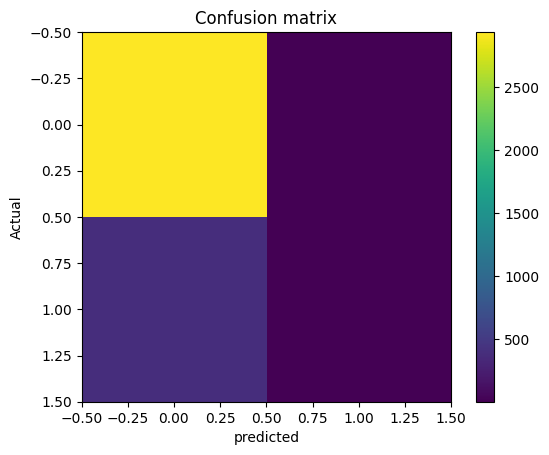

In [13]:
cm=confusion_matrix(y_test,y_pred)
plt.figure()
plt.imshow(cm)
plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

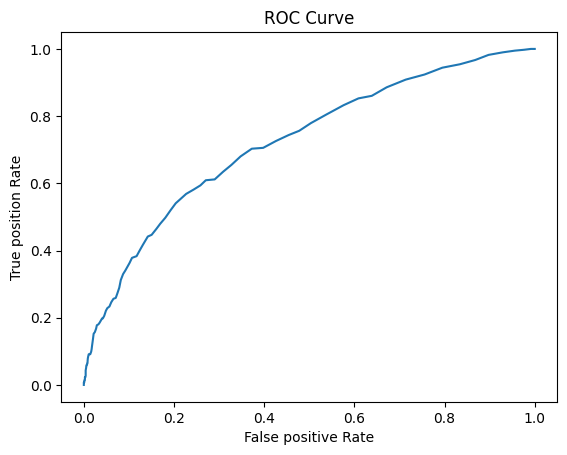

AUC Score 0.722448241140068


In [17]:
#ROCCurve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False positive Rate")
plt.ylabel("True position Rate")
plt.show()
print("AUC Score",roc_auc)

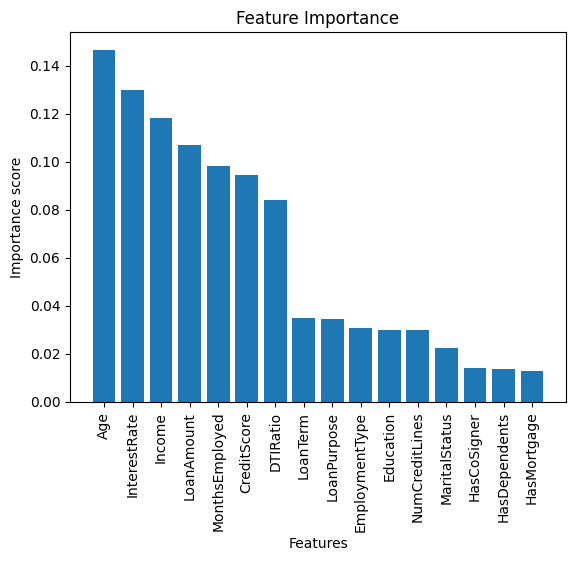


Top Important Features:

          Feature  Importance
0             Age    0.146613
6    InterestRate    0.129724
1          Income    0.118240
2      LoanAmount    0.106780
4  MonthsEmployed    0.098030


In [20]:
importances= model.feature_importances_
importance_df=pd.DataFrame({
    "Feature":X.columns,
    "Importance":importances
}).sort_values(by="Importance",ascending=False)
plt.figure()
plt.bar(importance_df["Feature"],
importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.xlabel("Features")
plt.ylabel("Importance score")
plt.show()

print("\nTop Important Features:\n")
print(importance_df.head())

In [24]:
def loan_decision(probability):
    if probability>0.6:
        return"Reject Loan"
    elif probability>0.3:
        return"Manual review"
    else:
        return"Approve Loan"



In [25]:
example_prob=y_prob[0]
print("\nExample customer Default probability:",example_prob)
print("Loan Decision",loan_decision(example_prob))


Example customer Default probability: 0.035
Loan Decision Approve Loan
